# 剛体のキネマティクス I
本稿では、剛体の姿勢表現について扱う。まずは、**方向余弦行列（DCM）**・**オイラー角**を用いた姿勢表現について学んでいく。まず定義の確認からはじめ、姿勢の加減算などの基本的な操作に加え、姿勢パラメータの変化率と角速度ベクトルの関係を記述する、**キネマティクスの微分方程式**について解説する。

:::{admonition} 項目 
:class: note
- 2.1) 剛体のキネマティクス
- 2.2) 方向余弦行列(DCM)
- 2.3) オイラー角
:::

:::{admonition} 目的 
:class: tip
- 方向余弦行列・オイラー角の定義・性質を理解する。
- 方向余弦行列・オイラー角の相互変換を理解する。
- 姿勢パラメータを用いた演算を実施できるようになる。
- 時間経過に伴う姿勢パラメータ変化を数値積分を用いて求める。
:::

In [1]:
# Import Relevant Libraries
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

## 2.1) 剛体のキネマティクスの概要
剛体のキネマティクスとは、変形しない物体（剛体）の位置と向き（姿勢）の時間変化を記述する。具体的には、以下の点が重要である。

**<ins>平行移動と回転</ins>**<br>
物体全体の移動（平行移動）と、物体がどの方向を向いているか（回転）を別々に扱う。平行移動は通常、3次元の座標 $(x,y,z)$ で表され、回転は**方向余弦行列（DCM）**、**オイラー角**、**クォータニオン**などのパラメータで表現される。

**<ins>座標系の利用</ins>**<br>
基本的には、慣性空間に固定された（と仮定できる）参照座標系（例えば地球中心座標系）と、物体に固定された機体座標系を用いて、どのように物体が動いているかを記述する。

**<ins>キネマティクスの微分方程式</ins>**<br>
物体の位置や姿勢の変化は時間微分により表現され、特に回転運動では角速度が姿勢の変化率と関係している。これにより、物体の未来の姿勢を予測できる。


このように、剛体のキネマティクスは、物体の動きを **「どこにあるか」** と **「どの方向を向いているか」** の両面から解析し、ロボット工学や航空宇宙分野などで広く応用されている。

本章では、主に 「どの方向を向いているか」（姿勢）について、**方向余弦行列(DCM)**、**オイラー角**の2種類の姿勢パラメータを通じて考えていこう。

## 2.2) 方向余弦行列 (DCM)

### 2.2.1) 方向余弦行列（DCM）とは
右手系の正規直交基底座標系として、座標系 $\mathbf{b}$ , $\mathbf{n}$ を考える。
各座標系の正規直交基底を $\hat{n}_i$ , $\hat{b}_i (i=1,2,3)$ として、各座標系を以下のように表現する。

$$
\{ \mathbf{n} \} = \begin{bmatrix}
\hat{n}_1 \\
\hat{n}_2 \\
\hat{n}_3
\end{bmatrix}, \quad
\{ \mathbf{b} \} = \begin{bmatrix}
\hat{b}_1 \\
\hat{b}_2 \\
\hat{b}_3
\end{bmatrix}
$$

```{figure} Images/coordinates.jpg
---
height: 400px
name: coordinates
---
```

ここで、各座標系の基底ベクトルの関係を考えてみる。上図より、基底ベクトル $\hat{b}_i$ は、基底ベクトル $\hat{n}_i$ との余弦（cos）を係数とする線型結合で表されるため、

$$
\begin{align*}
\hat{b}_1 &= \cos \alpha_{11} \hat{n}_1 + \cos \alpha_{12} \hat{n}_2 + \cos \alpha_{13} \hat{n}_3 \\
\hat{b}_2 &= \cos \alpha_{21} \hat{n}_1 + \cos \alpha_{22} \hat{n}_2 + \cos \alpha_{23} \hat{n}_3 \\
\hat{b}_3 &= \cos \alpha_{31} \hat{n}_1 + \cos \alpha_{32} \hat{n}_2 + \cos \alpha_{33} \hat{n}_3 \\
\end{align*}
$$

が成り立つ。ここで、

$$
[C] = \begin{bmatrix}
\cos \alpha_{11} & \cos \alpha_{12} & \cos \alpha_{13} \\
\cos \alpha_{21} & \cos \alpha_{22} & \cos \alpha_{23} \\
\cos \alpha_{31} & \cos \alpha_{32} & \cos \alpha_{33}
\end{bmatrix}
$$

のような行列 $\mathbf{C}$ を考えると、座標系 $\mathbf{b}$ , $\mathbf{n}$ の関係は、以下のように行列形式で表現できる。

$$
\{ \mathbf{b} \} = [C] \{ \mathbf{n} \}
$$

このとき、行列 $\mathbf{C}$ を座標系 $\mathbf{b}$ から $\mathbf{n}$ への座標変換行列または **方向余弦行列（Direction Cosine Matrix(DCM))** と呼ぶ。DCMは9つの成分を持つが、姿勢は本来3つのパラメータで表現できる。したがって、冗長性を持つ姿勢表現と言える。

### 2.2.2) 方向余弦行列(DCM)の性質
方向余弦行列（DCM）$[C]$ は、その定義および座標系の直交性に起因して、興味深い特徴を持つ。これらの特徴を一つ一つ見ていこう。

**1. 直交性**<br>
まず、式について、座標系を入れ替えて同じことを繰り返してみると、

$$
\{ \mathbf{n} \} 
=  \begin{bmatrix}
\cos \alpha_{11} & \cos \alpha_{21} & \cos \alpha_{31} \\
\cos \alpha_{12} & \cos \alpha_{22} & \cos \alpha_{32} \\
\cos \alpha_{13} & \cos \alpha_{23} & \cos \alpha_{33}
\end{bmatrix}\{ \mathbf{b} \}
= [C]^T \{ \mathbf{b} \}
$$

と表現できる。式と合わせると、

$$
\{ \mathbf{b} \} 
= [C] \{ \mathbf{n} \}
= [C] \ [C]^T \{ \mathbf{b} \}
$$

:::{admonition} DCMの直交性/Orthogonality of DCM
:class: note
$$
[C]^T [C] = [I]
$$
:::

が成り立つ。ここで $[I]$ は[単位行列](https://ja.wikipedia.org/wiki/%E5%8D%98%E4%BD%8D%E8%A1%8C%E5%88%97)である。これは、その定義から行列[C]が[直交行列](https://ja.wikipedia.org/wiki/%E7%9B%B4%E4%BA%A4%E8%A1%8C%E5%88%97#:~:text=%E7%9B%B4%E4%BA%A4%E8%A1%8C%E5%88%97%EF%BC%88%E3%81%A1%E3%82%87%E3%81%A3%E3%81%93%E3%81%86,%E3%82%88%E3%81%86%E3%81%AA%20M%20%E3%81%AE%E3%81%93%E3%81%A8%E3%80%82)であることを表している。方向余弦行列はその構成ベクトルとして、正規直交ベクトルを選んでいた。このとき、同一ベクトルの内積は1（単位行列の対角成分）となり、異なるベクトルの内積は0（単位行列の非対角成分）となることから、式が成り立つことを確認できる。

**2. 逆行列と転置**<br>
方向余弦行列 $[C]$ は直交行列であることが分かった。ここで、任意の直交行列においては、その転置行列が逆行列と等しくなる。これは、異なる各列（または行）の内積が0であり、同一の列（または行）の内積が1であるためである。したがって、

:::{admonition} DCMの転置/Tranpose of DCM
:class: note
$$
[C]^{-1} = [C]^T
$$
:::

が成り立つ。この特性は、多くの計算を単純化する上で非常に有用である。複雑な行列の逆行列計算を行う代わりに、単に行列を転置すればよいからである。

**3. 行列式**<br>
方向余弦行列（DCM）の行列式は、座標変換において重要な幾何学的解釈を持つ。

$$
\det([C]^T [C]) = \det([I]_{3\times3}) = 1
$$

$$
\therefore \det([C]) = ±1 
$$

右手系の座標系を考える場合、方向余弦行列（DCM）の行列式は+1に等しい。すなわち、

:::{admonition} DCMの行列式/Determinant of DCM
:class: note
$$
\det([C]) = +1
$$
:::

が成り立つ。これは、座標変換 $[C]$ によって、変換後の基底ベクトルがなす空間が伸びも縮みもしない（＝体積が保存）ことを意味する。つまり、行列式が+1であることは剛体の運動学を考える上で重要な条件となる。

**4. DCMの合成**<br>
方向余弦行列（DCM）の合成特性により、三つの異なる座標系を関連付けることが可能である。例えば、慣性座標系 $\mathcal{N}$ 、機体座標系 $\mathcal{B}$ 、および参照座標系 $\mathcal{R}$ が存在するとする。

$$
\mathcal{N}:\{\hat{\boldsymbol{n}}\} \quad \mathcal{B}:\{\hat{\boldsymbol{b}}\} \quad \mathcal{R}:\{\hat{\boldsymbol{r}}\}
$$

このとき、 $\mathcal{B}$ と $\mathcal{N}$ 、$\mathcal{R}$ と $\mathcal{B}$ は適当なDCMによって関係付けられるため、

$$
\{\hat{\boldsymbol{b}}\}=[C]\{\hat{\boldsymbol{n}}\}
$$

$$
\{\hat{\boldsymbol{r}}\}=[C^{\prime}\{\hat{\boldsymbol{b}}\}
$$

とおける。よって、これらを組み合わせると、

$$
\{\hat{\boldsymbol{r}}\}=\left[C^{\prime}\right][C]\{\hat{\boldsymbol{n}}\}=\left[C^{\prime \prime}\right]\{\hat{\boldsymbol{n}}\}
$$

したがって、 $\mathcal{N}$ から $\mathcal{B}$ への変換 $[BN]$ 、 $\mathcal{B}$ から $\mathcal{R}$ への変換を $[RB]$ と定義すると、$\mathcal{N}$ から直接 $\mathcal{R}$ への変換を表すDCM $[RN]$ は、以下のように二つのDCMを乗算することにより求められる。

:::{admonition} DCMの合成
:class: note
$$
[RN] = [RB] \cdot [BN]
$$
:::

結果として得られる $[RN]$ は、$\mathcal{N}$ から $\mathcal{R}$ へのベクトルの直接的な写像を表すDCMである。

この特性は、回転が結合的であるという事実に基づいている。すなわち、行列の乗算の順序は重要であるが、括る順序は任意に選ぶことができる。

なお、ここで重要なのは、DCM自体が加算または乗算されるのではなく、DCMによって変換されるベクトルに対して乗算が行われ、各座標系における新たな座標が得られる点である。この文脈における「加算」という用語は、行列の算術的加算ではなく、変換の組み合わせを意味する。

このDCMの合成は、宇宙機の機体座標系から中間座標系を経由して慣性座標系に変換を順次適用することにより、宇宙機の姿勢を慣性参照系で記述するために、航空宇宙工学で広く利用されている。

**問題1. オイラー角（3-2-1シーケンス）からDCMへの変換**<br>
ロール（φ）、ピッチ（θ）、ヨー（ψ）の3つのオイラー角を入力とし、3-2-1シーケンスでのDCMを求める関数を実装せよ。

ポイント:
- 3-2-1シーケンスの定義に基づいて、各回転行列を組み合わせる。

In [6]:
def dcm_321(roll, pitch, yaw):
    # ロール (φ) : x軸回り
    R_x = np.array([[1, 0, 0],
                    [0, np.cos(roll), -np.sin(roll)],
                    [0, np.sin(roll),  np.cos(roll)]])
    
    # ピッチ (θ) : y軸回り
    R_y = np.array([[ np.cos(pitch), 0, np.sin(pitch)],
                    [0, 1, 0],
                    [-np.sin(pitch), 0, np.cos(pitch)]])
    
    # ヨー (ψ) : z軸回り
    R_z = np.array([[np.cos(yaw), -np.sin(yaw), 0],
                    [np.sin(yaw),  np.cos(yaw), 0],
                    [0, 0, 1]])
    
    # 3-2-1シーケンス: R = R_x * R_y * R_z
    C = R_x @ R_y @ R_z
    return C

# テスト
roll, pitch, yaw = np.deg2rad([10, 20, 30])
C_321 = dcm_321(roll, pitch, yaw)
print("3-2-1シーケンスDCM:\n", C_321)

3-2-1シーケンスDCM:
 [[ 0.81379768 -0.46984631  0.34202014]
 [ 0.54383814  0.82317294 -0.16317591]
 [-0.20487413  0.31879578  0.92541658]]


**問題2. DCMの性質の確認（直交性、行列式）**<br>
問題1で求めたDCMに対し、その転置が逆行列になっているか（直交性）および行列式が+1であるかを確認するコードを書け。

ポイント:
- NumPyで転置、逆行列、行列式の計算を行う。

In [7]:
def check_dcm_properties(C):
    # 直交性: C^T * C ≈ I
    orthogonality = np.allclose(C.T @ C, np.eye(3), atol=1e-6)
    
    # 逆行列: C^{-1} ≈ C^T
    inv_equals_transpose = np.allclose(np.linalg.inv(C), C.T, atol=1e-6)
    
    # 行列式
    det_C = np.linalg.det(C)
    
    return orthogonality, inv_equals_transpose, det_C

# テスト 
ortho, inv_eq, det_val = check_dcm_properties(C_321)
print("直交性保持:", ortho)
print("逆行列が転置と一致:", inv_eq)
print("行列式:", det_val)


直交性保持: True
逆行列が転置と一致: True
行列式: 1.0


**問題3. DCMの合成**<br>
2つの回転（それぞれ異なるオイラー角セットで定義）に対するDCMを求め、それらを合成（乗算）して得られる全体のDCMを求めよ。

ポイント:
- 個別のDCMを計算し、行列乗算で合成する。
- 合成後のDCMも直交性と行列式+1を持つことを確認する。

In [8]:
# 2組のオイラー角（3-2-1シーケンス）を定義
roll1, pitch1, yaw1 = np.deg2rad([10, 20, 30])
roll2, pitch2, yaw2 = np.deg2rad([15, -10, 25])

# 個別のDCMを計算
C1 = dcm_321(roll1, pitch1, yaw1)
C2 = dcm_321(roll2, pitch2, yaw2)

# 合成: まずC2を適用し、その後C1を適用 (注意：適用順序に注意)
C_total = C1 @ C2
print("合成したDCM:\n", C_total)

# 合成後のDCMの性質確認
ortho_total, inv_eq_total, det_total = check_dcm_properties(C_total)
print("合成後の直交性保持:", ortho_total)
print("合成後の逆行列が転置と一致:", inv_eq_total)
print("合成後の行列式:", det_total)


合成したDCM:
 [[ 0.64308782 -0.70295768  0.30379032]
 [ 0.74524684  0.48320897 -0.45947387]
 [ 0.17619648  0.52188083  0.83462279]]
合成後の直交性保持: True
合成後の逆行列が転置と一致: True
合成後の行列式: 0.9999999999999996


### 2.2.3) Kinematic differential equation of DCM
Kinematic differential equation of DCMを和訳すると、方向余弦行列の運動学的微分方程式となるだろうか。これは、剛体の回転運動に基づく運動を理解する上で極めて重要である。「キネマティクス」という側面は物体の位置（および姿勢）の記述に関係し、「微分方程式」という部分はその時間変化率を表す。

DCMを $[C]$ と表すとき、その運動学的微分方程式は、物体の角速度と姿勢変化率との基本的な関係式である。

$$
\dot{[C]} = \frac{d[C]}{dt}
$$

この方程式は物体の姿勢を表すDCMが時間とともにどのよう変化するのかを示している。

ここで、物体の角速度　$\boldsymbol{\omega}$ を考えてみよう。角速度は姿勢がどのように変化するかを決定する重要な要素であり、機体座標系において次のように表される。

:::{admonition} 角速度/Angular Velocity
:class: note
$$
\boldsymbol{\omega} = \omega_1 \mathbf{\hat{b}}_1 + \omega_2 \mathbf{\hat{b}}_2 + \omega_3 \mathbf{\hat{b}}_3
$$
:::

ここで、 $\omega_1, \omega_2,$ and $\omega_3$ は機体座標系における角速度の各成分であり、 $\mathbf{b}_1, \mathbf{b}_2,$ and $\mathbf{b}_3$ は機体座標系の単位ベクトルである。

慣性座標系から見た機体座標系の単位ベクトルの変化を求めるため、機体座標系の姿勢ベクトルの時間微分を考える。ここでキネマティクスの輸送定理を用い、機体座標系の単位ベクトルと慣性座標系との関係は

:::{admonition} 輸送定理/Transport Theorem
:class: note
$$
^N\frac{d\hat{\mathbf{b}}_i}{dt} = ^B\frac{d\hat{\mathbf{b}}_i}{dt} + \boldsymbol{\omega}_{B/N} \times \hat{\mathbf{b}}_i
$$
:::

と表される。機体座標系内では単位ベクトルは時間に対して変化しないため、右辺の第一項はゼロとなり、残る項は角速度ベクトル $\boldsymbol{\omega}_{B/N}$ と機体座標系の単位ベクトル ${\mathbf{b}}_i$ との外積となる。

ここで、行列形式の外積演算子を導入してみよう。この演算子は、ベクトルを歪対称行列に変換し、行列演算による外積の表現を可能にする。歪対称行列はベクトル    $\mathbf{x}=\left[x_1, x_2, x_3\right]^T$ に対して、次にように定義される。

:::{admonition} 歪対称行列/Skew Symmetric Matrix
:class: note
$$
[\boldsymbol{\tilde{x}}] = \begin{bmatrix}
0 & -x_3 & x_2 \\
x_3 & 0 & -x_1 \\
-x_2 & x_1 & 0
\end{bmatrix}
$$
:::
ただし、

$$
\begin{aligned}
& \boldsymbol{x} \times \boldsymbol{y} \equiv[\tilde{\boldsymbol{x}}] \boldsymbol{y} \\
& {[\tilde{\boldsymbol{x}}]^T=-[\tilde{\boldsymbol{x}}]}
\end{aligned}
$$

この演算子は、外積を行列形式で表現するために用いられ、運動学的方程式を行列演算で記述する上で不可欠である。

行列形式の外積演算子を導入することで、機体座標系の運動学的微分方程式は次のように表される

$$
^{N}\frac{d\{\mathbf{b}\}}{dt} = -\boldsymbol[{\tilde{\omega}}]\{\mathbf{b}\}
$$

ここで, $\boldsymbol{\tilde{\omega}}$ は角速度の歪対称行列を表し、上付き文字 $^N$ は慣性座標系での微分を意味する。

運動学的微分方程式は、機体座標系と慣性座標系との間の姿勢変換の時間変化を記述する。まず、機体座標系の単位ベクトル集合 $\{\hat{b}\}$ を、DCM[C] と慣性座標系の単位ベクトル集合 $\{\hat{n}\}$ の積として

$$
\{\hat{b}\} = [C]\{\hat{n}\}
$$

と表す。この両辺を慣性座標系において微分すると、

$$
^N\frac{d\{\hat{\mathbf{b}}\}}{dt} = \frac{d([C]\{\hat{\mathbf{n}}\})}{dt} = \frac{d[C]}{dt} \{\hat{\mathbf{n}}\} + [C]^N\frac{d\{\hat{\mathbf{n}}\}}{dt} = \dot{[C]}\{\hat{\mathbf{n}}\}
$$

となる。これにより、

$$
^N\frac{d\{\hat{b}\}}{dt} = -[\boldsymbol{\tilde{\omega}}]\{\hat{b}\} = -[\boldsymbol{\tilde{\omega}}][C]\{\hat{n}\} =  [\dot{C}] \{\hat{n}\}
$$

が得られ、整理すると、

$$
(\dot{[C]} + [\boldsymbol{\tilde{\omega}}][C])\{\hat{n}\} = 0
$$

となる。これは任意の$\{\hat{n}\}$に対して成り立つため、DCMの運動学的微分方程式は

:::{admonition} DCMの微分方程式/Differential Equation of DCM
:class: note
$$
\dot{[C]} = -[\boldsymbol{\tilde{\omega}}][C]
$$
:::

と得られる。
この式により、角速度 $\boldsymbol{\omega}$ に基づいて、DCMおよびそれによって定義される物体の姿勢が時間とともにどのように変化するかを追うことが可能となる。

ここで、運動学微分方程式を用いるとある興味深い事実が得られる。

まず、行列とその転置の時間微分を考えると、

$$
\frac{d}{dt}([C][C]^T) = \dot{[C]}[C]^T + [C]\dot{[C]}^T
$$

微分方程式 $\dot{[C]} = -[\boldsymbol{\tilde{\omega}}][C]$ を代入すると、

$$
\frac{d}{dt}([C][C]^T) = -\boldsymbol{\tilde{\omega}}[C][C]^T - [C]\boldsymbol{\tilde{\omega}}^T[C]^T
$$

となり、さらに簡略化すると、

$$
\frac{d}{dt}([C][C]^T) = -\boldsymbol{\tilde{\omega}} + \boldsymbol{\tilde{\omega}} = 0
$$

が得られる。これにより、DCMの直交性が時間とともに保存されることが示され、剛体運動学において極めて重要な性質である。

### 2.2.4) DCM計算の手順
ここまで、DCMの概要とその性質、運動学微分方程式について扱ってきた。以上をまとめ、実用上の手順をStep by stepで確認していこう。

**_Step 1: 座標系の定義_**<br>
- 関連づける座標系を定義する。例えば、機体座標系$\mathcal{B}$、慣性座標系$\mathcal{N}$など。
- 各座標系の軸を識別する。例えば、機体座標系では $b_1, b_2, b_3$ 、慣性座標系では　$n_1, n_2, n_3$ とする。

**_Step 2: 方向余弦の算出_**<br>
- 2つの座標系の各軸間の角度の余弦を計算する。
- これらの角度は座標系間の関係を定義し、DCMの各要素を構成する。

**_Step 3: DCMの構築_**<br>
- 以下のように、方向余弦を行列に配置してDCMを構成する：

$$
[C]_{BN} = \begin{bmatrix}
\cos(\angle(b_1, n_1)) & \cos(\angle(b_1, n_2)) & \cos(\angle(b_1, n_3)) \\
\cos(\angle(b_2, n_1)) & \cos(\angle(b_2, n_2)) & \cos(\angle(b_2, n_3)) \\
\cos(\angle(b_3, n_1)) & \cos(\angle(b_3, n_2)) & \cos(\angle(b_3, n_3))
\end{bmatrix}
$$

- ここで、$[C]_{BN}$ は、機体座標系$\mathcal{B}$の姿勢が慣性座標系$\mathcal{N}$に対して、どのように定義されるかを表すDCMである。

**_Step 4: DCMを用いたベクトル変換_**<br>
- DCMを適用して、機体座標系から慣性座標系への、あるいはその逆の変換を行う。
- 例えば 機体座標系のベクトル$\mathbf{v}_b$は慣性座標系では $\mathbf{v}_n = [C]_{BN} \mathbf{v}_b$と表される。

**_Step 5: DCMを用いた姿勢運動学への応用_**<br>
- DCMを用いて、物体の姿勢の時間変化を記述する方程式を導出する。
- 例えばDCMを含む運動学的微分方程式は

$$
\dot{[C]}_{BN} = [\boldsymbol{\tilde{\omega}}] [C]_{BN}
$$

　と表される。ここで $\boldsymbol{\omega}$ は物体の角速度、$[\boldsymbol{\tilde{\omega}}]$ はその歪対称行列である。

**_Step 6: DCMの更新_**<br>
- 物体の回転運動を考慮しながら、運動学的微分方程式を数値積分することにより、時間とともにDCMを更新する。

以上の手順に従うことで、宇宙機の姿勢決定、制御系の設計、剛体運動のシミュレーションなど、航空宇宙工学の様々な応用においてDCMを効果的に構築・利用することが可能となる。

**問題4. 運動学的微分方程式を用いたDCMの数値積分**<br>
定常な角速度 $\boldsymbol{\omega}$ が与えられた場合、運動学的微分方程式

$$
\dot{[C]} = -[\boldsymbol{\tilde{\omega}}][C]
$$

を4次のRunge-kutta法で数値積分し、一定時間後のDCMを求めよ。
ポイント:
- 歪対称行列の生成関数を実装する。
- 小刻みな時間間隔でDCMを更新する。

In [1]:
import numpy as np

def skew_symmetric(omega):
    """ 3次元ベクトル omega から斜対称行列を作成 """
    return np.array([[0, -omega[2], omega[1]],
                     [omega[2], 0, -omega[0]],
                     [-omega[1], omega[0], 0]])

def integrate_dcm_rk4(C0, omega, dt, steps):
    """
    初期DCM C0 と固定角速度 omega に対して、RK4法で運動学的微分方程式
    dC/dt = -[tilde(omega)] * C を積分する。
    dt: 時間刻み, steps: 積分ステップ数
    """
    C = C0.copy()
    Omega_tilde = skew_symmetric(omega)
    for _ in range(steps):
        k1 = -Omega_tilde @ C
        k2 = -Omega_tilde @ (C + 0.5 * dt * k1)
        k3 = -Omega_tilde @ (C + 0.5 * dt * k2)
        k4 = -Omega_tilde @ (C + dt * k3)
        C = C + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
        # 数値誤差対策として必要に応じて直交性を再調整することも検討する
    return C

# テスト
C0 = np.eye(3)            # 初期姿勢は単位行列
omega = np.array([0.1, 0.2, 0.3])  # 固定の角速度 (rad/s)
dt = 0.01                 # 0.01秒刻み
steps = 1000              # 合計10秒間のシミュレーション

C_final = integrate_dcm_rk4(C0, omega, dt, steps)

print("積分後のDCM (RK4法):\n", C_final)
print("積分後の行列式:", np.linalg.det(C_final))

積分後のDCM (RK4法):
 [[-0.69492056 -0.19200697  0.69297817]
 [ 0.71352099 -0.30378504  0.6313497 ]
 [ 0.08929286  0.93319235  0.34810748]]
積分後の行列式: 0.9999999999999616


## 2.3) オイラー角

### 2.3.1) - オイラー角とは
特定の軸周りに3回連続して回転を行うことで、物体の角度位置を表現する手法であり、その名はスイスの数学者[レオンハルト・オイラー](https://ja.wikipedia.org/wiki/%E3%83%AC%E3%82%AA%E3%83%B3%E3%83%8F%E3%83%AB%E3%83%88%E3%83%BB%E3%82%AA%E3%82%A4%E3%83%A9%E3%83%BC)に由来する。オイラー角は、ロボット工学、航空宇宙、コンピュータグラフィックス、物理学など、物体の回転や向きを扱う多くの分野で広く利用されている。

オイラー角は、3次元空間における剛体の向きを表現する方法であり、通常は以下の3つの角度から構成される。
- ロール ($\phi$):	 物体の $X$ 軸周りの回転を表す。
- ピッチ ($\theta$):	 物体の $Y$ 軸周りの回転を表す。
- ヨー ($\psi$): 	物体の $Z$ 軸周りの回転を表す。

### 2.3.2) - 回転行列

```{figure} Images/yaw_pitch_roll.png
---
height: 400px
name: YPR
---
```

まずは、$X,Y,Z$各軸周りの3次元空間における回転行列を考えてみよう。

:::{admonition} 一軸周りの回転/Rotation Around Single Axis
:class: note
ロール $\phi$ ($X$ 軸周りの回転):

$$
R_1(\phi) = \begin{bmatrix}
1 & 0 & 0 \\
0 & \cos\phi & \sin\phi \\
0 & -\sin\phi & \cos\phi
\end{bmatrix}
$$

ピッチ $\theta$ ($Y$ 軸周りの回転):

$$
R_2(\theta) = \begin{bmatrix}
\cos\theta & 0 & -\sin\theta \\
0 & 1 & 0 \\
\sin\theta & 0 & \cos\theta
\end{bmatrix}
$$

ヨー $\psi$ ($Z$ 軸周りの回転):

$$
R_3(\psi) = \begin{bmatrix}
\cos\psi & \sin\psi & 0 \\
-\sin\psi & \cos\psi & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

:::

なお、ここで示した各軸回りの回転行列は、それ自体では単一軸周りのDCMに過ぎず、これらが任意の回転シーケンスを構成するための基本ブロックとなる。次に、これらのブロックを組み合わせた回転シーケンスについて説明する。

オイラー角を用いて3次元空間で剛体を回転させる場合、各軸周りの回転行列を順に掛け合わせて、最終的な姿勢を表す回転行列 $C$ を得る。
各回転シーケンスは固有の最終姿勢を定め、**回転の順序**が非常に重要となる。行列乗算と実際の回転操作の関係を考えてみると、実際の回転操作で「1番目に実施された回転」は行列乗算の際には最後に掛けられ、「3番目に実施された回転」は最初に掛けられる。
このように、回転行列の積は回転の適用順序の逆順となるため、正しい複合回転行列を得るためには、乗算順序に十分注意する必要がある。具体例を挙げながら、理解を深めていこう。

### 2.3.3) 回転順序
オイラー角の回転シーケンスには対称および非対称の組み合わせがあり、合計で12種類のシーケンスが存在する。
- $X$軸周りの回転：1
- $Y$軸周りの回転：2
- $Z$軸周りの回転：3
のように回転軸に番号を割り当てることで、一般的なXYZ表記ではなく、数値表記（例: ZYX → 3-2-1）を使用する。

このとき、計12種類の回転シーケンスは次のように整理される。

:::{admonition} 回転シーケンス/Rotation Sequence
:class: note
| **分類**       | **シーケンス**                          |
|----------------|----------------------------------------|
| **非対称シーケンス** | • 3-2-1 <br> • 3-1-2 <br> • 2-3-1 <br> • 2-1-3 <br> • 1-3-2 <br> • 1-2-3 |
| **対称シーケンス**  | • 3-1-3 <br> • 3-2-3 <br> • 2-1-2 <br> • 2-3-2 <br> • 1-3-1 <br> • 1-2-1 |
:::

例えば「3-2-1」シーケンスを考えてみよう。これは、$Z$軸周り→$Y$軸周り→$X$軸周りの順で回転を行うシーケンスである。先ほどの単一軸周りの回転行列を用いることで、最終的な回転行列は以下のように表される。

$$
C = [R_1(\phi)] [R_2(\theta)] [R_3(\psi)] \\
$$

これを見ると分かるように、回転順序は「3-2-1」の順であるが、回転行列は「1-2-3」の順で構成されることに注意しよう。
$C$について、さらに計算を進めていくと、

$$
\begin{aligned}
C &=
\left[\begin{array}{ccc}
1 & 0 & 0 \\
0 & \cos \phi & \sin \phi \\
0 & -\sin \phi & \cos \phi
\end{array}\right]\left[\begin{array}{ccc}
\cos \theta & 0 & -\sin \theta \\
0 & 1 & 0 \\
\sin \theta & 0 & \cos \theta
\end{array}\right]\left[\begin{array}{ccc}
\cos \psi & \sin \psi & 0 \\
-\sin \psi & \cos \psi & 0 \\
0 & 0 & 1
\end{array}\right] \\

&=\left[\begin{array}{ccc}
c \theta c \psi & c \theta s \psi & -s \theta \\\\
s \phi s \theta c \psi-c \phi s \psi & s \phi s \theta s \psi+c \phi c \psi & s \phi c \theta \\\\
c \phi s \theta c \psi+s \phi s \psi & c \phi s \theta s \psi-s \phi c \psi & c \phi c \theta
\end{array}\right]

\end{aligned}
$$

と表される。ただし、$s \xi = \sin\xi, c \xi = \cos\xi$ の省略記号を用いた。
したがって、行列$C$の成分を用いると、各オイラー角は次のように表される。

:::{admonition} オイラー角とDCMの関係(3-2-1)/Relationship between Euler Angle and DCM(3-2-1)
:class: note
$$
\begin{aligned}
\psi & =\tan ^{-1}\left(\frac{C_{12}}{C_{11}}\right) \\
\theta & =-\sin ^{-1}\left(C_{13}\right) \\
\phi & =\tan ^{-1}\left(\frac{C_{23}}{C_{33}}\right)
\end{aligned}
$$
:::

ただし、実用上は逆正接関数の特異点に気をつけて処理する必要がある。


### 2.3.4) - 特異点とジンバルロック
剛体の姿勢を 3つの回転角で直感的に表現できるため、航空機、人工衛星、惑星探査機の姿勢制御に広く利用されるオイラー角であるが、大きな制限が存在する。それが、**ジンバルロック**と呼ばれる現象である。ジンバルロックとは、オイラー回転の3つの軸のうち2つが一致し、1つの自由度が失われることで発生する。つまり、本来3自由度あるはずの姿勢が2自由度になっていますことを意味する。この結果、揃った軸まわりの回転を区別できなくなり、実質的にシステムが「ロック」される。

具体例を挙げると、例えば第2回転角（ピッチ角）が ±90度になると、ロール軸とヨー軸が重なり、独立した回転操作が不可能になる。
つまり、オイラー角を使う以上、常に特異点（計算が不安定になる状態）から90度以内にいることになる。たとえジンバルロックが発生しても、物体の姿勢自体は正しく表現できる。しかし、特定の回転軸を自由に制御することができなくなるため、実際の制御や操作には大きな制約が生じる。
ジンバルロックの動きを視覚的に理解したい場合は[こちら](https://arihide.github.io/demos/gimbal/)を参照すると良い。また、数学的な背景については、[こちら](https://qiita.com/Arihi/items/4b306feb3d9e6cd93204)が参考になる。

ジンバルロックは、航空宇宙、ロボティクス、コンピュータグラフィックスなど、姿勢制御が重要な分野で大きな問題となる。自由度を失うことで、特定の回転ができなくなり、意図しない挙動を引き起こすことがある。

この問題を回避するため、クォータニオン（四元数）などの代替的な姿勢表現が広く採用されている。ジンバルロックは、オイラー角が姿勢を最小の3パラメータ用いて表現していることに起因する。正規化された4つのパラメータで姿勢を表現する**クォータニオン**を使えば、ジンバルロックの影響を受けず、スムーズな回転制御が可能になる。クォータニオンについては、別の章で確認しよう。

### 2.3.5) - オイラー角の微分方程式

```{figure} Images/3axis.jpg
---
height: 400px
name: 3axis
---
```

DCMと同様に、オイラー角についても微分方程式を数値積分することで、その時間変化を見ることが出来る。
オイラー角 $\psi$, $\theta$, $\phi$ の微分方程式を求めるまでの手順をstep by stepで見ていこう。

1. **剛体の角速度ベクトル**
   ボデイ座標系における角速度ベクトルは、次のように表される。
   
    $$
    \boldsymbol{\omega} = \omega_1 \hat{b}_1 + \omega_2 \hat{b}_2 + \omega_3 \hat{b}_3
    $$

2. **中間座標系を用いた表現**
    オイラー角の定義に基づくと、角速度ベクトルは中間座標系 (Intermediate frame) を介して次のように分解できる。

   $$
   \boldsymbol{\omega}= \dot{\psi} \hat{n}_3 + \dot{\theta} \hat{b}'_2 + \dot{\phi} \hat{b}_1
   $$

   ただし、各基底ベクトルは図中での定義を用いている。

3. **中間座標系の単位ベクトル**
    中間座標系の単位ベクトル $\hat{b}'_2$ は、機体座標系の基底 $\hat{b}_2, \hat{b}_3$ を用いて次のように表せる。

    $$
    \hat{b}'_2 = \cos\phi \hat{b}_2 - \sin\phi \hat{b}_3
    $$

    同様に $\hat{n}_3$ は $\hat{b}_1$, $\hat{b}_2$, $\hat{b}_3$　を用いて、

    $$
    \hat{n}_3 = -\sin\theta \hat{b}_1 + \sin\phi \cos\theta \hat{b}_2 + \cos\phi \cos\theta \hat{b}_3
    $$

    と表せる。

4. **角速度ベクトルの比較**
    角速度ベクトルの両表現を比較すると、

    $$
    \boldsymbol{\omega} = \omega_1 \hat{b}_1 + \omega_2 \hat{b}_2 + \omega_3 \hat{b}_3 = \dot{\psi} \hat{n}_3 + \dot{\theta} \hat{b}'_2 + \dot{\phi} \hat{b}_1
    $$

    3項で得た2式を代入すると、

    $$
    \begin{aligned}
    \dot{\psi} \hat{n}_3 + \dot{\theta} \hat{b}'_2 + \dot{\phi} \hat{b}_1 
    &= \dot{\psi} (-\sin\theta \hat{b}_1 + \sin\phi \cos\theta \hat{b}_2 + \cos\phi \cos\theta \hat{b}_3) + \dot{\theta} (\cos\phi \hat{b}_2 - \sin\phi \hat{b}_3) + \dot{\phi} \hat{b}_1 \\
    &=(-\dot{\psi} \sin\theta + \dot{\phi})\hat{b}_1 + (\dot{\psi} \sin\phi \cos\theta +  \dot{\theta}\cos\phi)\hat{b}_2 + (\cos\phi \cos\theta - \dot{\theta} \sin\phi)\hat{b}_3
    \end{aligned}
    $$

    整理すると、角速度ベクトルは $\boldsymbol{\omega}$ はオイラー角を用いて、次のように表される。

    $$
    \begin{aligned}
    \omega_1 &= -\dot{\psi} \sin\theta + \dot{\phi} \\
    \omega_2 &= \dot{\psi} \sin\phi \cos\theta +  \dot{\theta}\cos\phi \\
    \omega_3 &= \cos\phi \cos\theta - \dot{\theta} \sin\phi
    \end{aligned}
    $$

5. **オイラー角の微分方程式x:**
    最終的に、オイラー角の時間変化と角速度の関係は次の線形変換で表される。

    $$
    \boldsymbol{\omega}^B = \begin{bmatrix}
        \omega_1 \\
        \omega_2 \\
        \omega_3
    \end{bmatrix} = \begin{bmatrix}
        -\sin\theta & 0 & 1 \\
        \sin\phi \cos\theta & \cos\phi & 0 \\
        \cos\phi \cos\theta & -\sin\phi & 0
    \end{bmatrix} \begin{bmatrix}
        \dot{\psi} \\
        \dot{\theta} \\
        \dot{\phi}
    \end{bmatrix}
    $$

    逆に、オイラー角の時間変化を角速度ベクトルの成分で表すと

    :::{admonition} オイラー角の微分方程式（3-2-1）/Differential Equation of Eular Angle (3-2-1)
    :class: note
    $$
    \begin{bmatrix}
        \dot{\psi} \\
        \dot{\theta} \\
        \dot{\phi}
    \end{bmatrix} = \frac{1}{\cos\theta} \begin{bmatrix}
        0 & \sin\phi & \cos\phi \\
        0 & \cos\phi \cos\theta & -\sin\phi \cos\theta \\
        \cos\theta & \sin\phi \sin\theta & \cos\phi \sin\theta
    \end{bmatrix} \begin{bmatrix}
        \omega_1 \\
        \omega_2 \\
        \omega_3
    \end{bmatrix} = \mathbf{B}(\psi, \theta, \phi) \boldsymbol{\omega}^B
    $$
    :::

以上より、角速度とオイラー角の時間変化を結びつける微分方程式が得られた。なお、今回は(3-2-1)シーケンスに対応する微分方程式を求めたが、同様の微分方程式が、各回転シーケンスに対してそれぞれ導出される。例えば、(3-1-3)シーケンスを考える場合は、別の微分方程式を利用しなければならない。ここからも回転順序を意識することの重要性がわかるだろう。

**問題：基本的な回転行列の実装**<br>：
オイラー角に基づく回転行列を計算する関数を実装してください。次の3つの軸に対する回転行列を計算します。

- ロール（Roll）: X軸回りの回転
- ピッチ（Pitch）: Y軸回りの回転
- ヨー（Yaw）: Z軸回りの回転

それぞれの回転行列を計算する関数を作り、それらを組み合わせて、指定した順序で3次元ベクトルを回転させるプログラムを作成してください。

ステップ：
各軸（X、Y、Z）に対する回転行列を関数として実装
3つの回転行列を組み合わせて、オイラー角に基づく回転を実装
3Dベクトルを与え、その回転後の結果を確認する

In [34]:
import numpy as np

def R_x(phi):
    """ X軸回りの回転行列を計算 """
    c = np.cos(np.radians(phi))
    s = np.sin(np.radians(phi))
    return np.array([
        [1, 0, 0],
        [0, c, -s],
        [0, s, c]
    ])

def R_y(theta):
    """ Y軸回りの回転行列を計算 """
    c = np.cos(np.radians(theta))
    s = np.sin(np.radians(theta))
    return np.array([
        [c, 0, s],
        [0, 1, 0],
        [-s, 0, c]
    ])

def R_z(psi):
    """ Z軸回りの回転行列を計算 """
    c = np.cos(np.radians(psi))
    s = np.sin(np.radians(psi))
    return np.array([
        [c, -s, 0],
        [s, c, 0],
        [0, 0, 1]
    ])

def apply_rotation(v, phi, theta, psi):
    """ 指定されたオイラー角に基づいて(3-2-1)でベクトルvを回転させる """
    R = R_x(psi) @ R_y(theta) @ R_z(phi)
    return R @ v

# テスト
v = np.array([1, 0, 0])  # 初期ベクトル
phi, theta, psi = 30, 45, 60  # ロール、ピッチ、ヨー角
rotated_v = apply_rotation(v, phi, theta, psi)
print(rotated_v)


[0.61237244 0.78033009 0.12682648]


**問題：回転順序の確認**<br>
オイラー角の回転順序（例えば、XYZとZYX）の違いが最終的な回転結果にどのように影響を与えるかを確認してください。異なる回転順序を指定して、同じオイラー角（例えば、30度、45度、60度）で回転したときの最終的な結果を比較してください。

ステップ：
- 回転順序を変更できるように関数を改良
- 同じオイラー角で異なる順序（例えばXYZ、ZYX）で回転を適用し、その結果を比較

In [35]:
def apply_rotation_with_order(v, phi, theta, psi, order='XYZ'):
    """ 指定された回転順序でベクトルvを回転させる """
    if order == 'XYZ':
        R = R_z(psi) @ R_y(theta) @ R_x(phi)
    elif order == 'ZYX':
        R = R_x(phi) @ R_y(theta) @ R_z(psi)
    else:
        raise ValueError("Invalid rotation order")
    return R @ v

# 使用例
v = np.array([1, 0, 0])  # 初期ベクトル
phi, theta, psi = 30, 45, 60  # ロール、ピッチ、ヨー角

rotated_v_xyz = apply_rotation_with_order(v, phi, theta, psi, order='XYZ')
rotated_v_zyx = apply_rotation_with_order(v, phi, theta, psi, order='ZYX')

print(f"XYZ順序で回転後: {rotated_v_xyz}")
print(f"ZYX順序で回転後: {rotated_v_zyx}")


XYZ順序で回転後: [ 0.35355339  0.61237244 -0.70710678]
ZYX順序で回転後: [0.35355339 0.9267767  0.12682648]


**オイラー角の特異点（ジンバルロック）の確認**<br>
課題内容：
オイラー角を使って姿勢の変化をシミュレートし、特にピッチ角が90度または-90度になるときにジンバルロック（自由度の喪失）がどのように発生するかを確認します。これを視覚的に示すために、回転行列を使ってシミュレーションを行い、ジンバルロックの影響を確認してください。

ステップ：
- ピッチ角を90度または-90度に変更
- その時点でロールとヨーの回転軸が一致することを確認
- 実際に回転した結果が予想通りかどうかを視覚化

In [36]:
# ピッチ角が90度になるとジンバルロックが発生することを確認
theta = 90  # ピッチ角を90度に設定
phi_1, psi_1 = 30, 50  # 和の等しいロール、ヨーのペアを設定
phi_2, psi_2 = 20, 60  
v = np.array([1, 0, 0])  # 初期ベクトル
rotated_v1 = apply_rotation(v, phi_1, theta, psi_1)
rotated_v2 = apply_rotation(v, phi_2, theta, psi_2)
print(rotated_v1)  
print(rotated_v2)

[ 5.30287619e-17  9.84807753e-01 -1.73648178e-01]
[ 5.75395780e-17  9.84807753e-01 -1.73648178e-01]


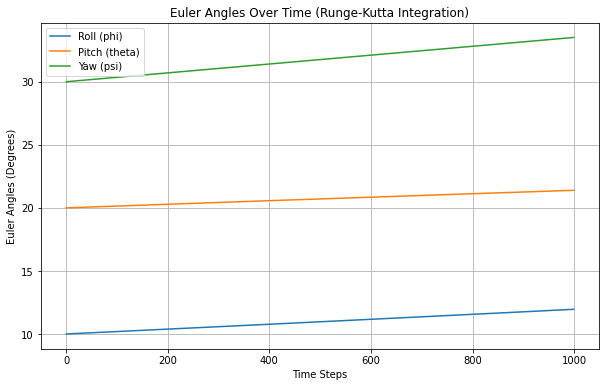

最終DCM行列:
[[ 0.7763151  -0.47713633  0.41191721]
 [ 0.51409048  0.85739255  0.02426927]
 [-0.3647545   0.19292211  0.91089802]]


In [37]:
import numpy as np
import matplotlib.pyplot as plt

# 回転行列を計算する関数
def rotation_matrix_x(phi):
    """ X軸回りの回転行列 """
    return np.array([
        [1, 0, 0],
        [0, np.cos(np.radians(phi)), -np.sin(np.radians(phi))],
        [0, np.sin(np.radians(phi)), np.cos(np.radians(phi))]
    ])

def rotation_matrix_y(theta):
    """ Y軸回りの回転行列 """
    return np.array([
        [np.cos(np.radians(theta)), 0, np.sin(np.radians(theta))],
        [0, 1, 0],
        [-np.sin(np.radians(theta)), 0, np.cos(np.radians(theta))]
    ])

def rotation_matrix_z(psi):
    """ Z軸回りの回転行列 """
    return np.array([
        [np.cos(np.radians(psi)), -np.sin(np.radians(psi)), 0],
        [np.sin(np.radians(psi)), np.cos(np.radians(psi)), 0],
        [0, 0, 1]
    ])

# DCMを計算する関数
def euler_to_dcm(phi, theta, psi):
    """ オイラー角からDCMへの変換 """
    R_x = rotation_matrix_x(phi)
    R_y = rotation_matrix_y(theta)
    R_z = rotation_matrix_z(psi)
    
    # 回転行列の順番はZ-X'-Z''（ヨー、ピッチ、ロール）
    return R_z @ R_y @ R_x

def dcm_to_euler(R):
    """ DCMからオイラー角への変換 """
    # ピッチ角の計算（アークサイン）
    theta = np.arcsin(-R[2, 0])  # ピッチ角（θ）
    
    # ピッチ角が90度または-90度の場合（特異点）
    if np.cos(theta) != 0:
        # atan2を使ってヨー（ψ）とロール（φ）を計算
        psi = np.arctan2(R[1, 0], R[0, 0])  # ヨー角（ψ）
        phi = np.arctan2(R[2, 1], R[2, 2])  # ロール角（φ）
    else:
        # 特異点のため、ヨー角とロール角を特別に計算
        psi = 0
        phi = np.arctan2(-R[1, 2], R[1, 1])  # ロール角（φ）

    return np.degrees(phi), np.degrees(theta), np.degrees(psi)

# 角速度からオイラー角の時間微分を計算
def euler_angle_derivatives(omega, phi, theta, psi):
    """ オイラー角の時間微分（角速度ベクトル）を計算 """
    omega_1, omega_2, omega_3 = omega
    
    # オイラー角の変化率
    dphi = omega_1 + np.tan(np.radians(theta)) * (omega_2 * np.cos(np.radians(phi)) + omega_3 * np.sin(np.radians(phi)))
    dtheta = omega_2 * np.cos(np.radians(phi)) - omega_3 * np.sin(np.radians(phi))
    dpsi = omega_3 * np.cos(np.radians(theta)) + omega_2 * np.sin(np.radians(theta))
    
    return np.array([dphi, dtheta, dpsi])

# 4次のRunge-Kutta法でオイラー角を積分
def runge_kutta_4(omega, phi, theta, psi, dt):
    """ 4次のRunge-Kutta法でオイラー角を積分 """
    k1 = euler_angle_derivatives(omega, phi, theta, psi)
    k2 = euler_angle_derivatives(omega, phi + 0.5 * k1[0] * dt, theta + 0.5 * k1[1] * dt, psi + 0.5 * k1[2] * dt)
    k3 = euler_angle_derivatives(omega, phi + 0.5 * k2[0] * dt, theta + 0.5 * k2[1] * dt, psi + 0.5 * k2[2] * dt)
    k4 = euler_angle_derivatives(omega, phi + k3[0] * dt, theta + k3[1] * dt, psi + k3[2] * dt)
    
    dphi = (k1[0] + 2*k2[0] + 2*k3[0] + k4[0]) / 6
    dtheta = (k1[1] + 2*k2[1] + 2*k3[1] + k4[1]) / 6
    dpsi = (k1[2] + 2*k2[2] + 2*k3[2] + k4[2]) / 6
    
    return phi + dphi * dt, theta + dtheta * dt, psi + dpsi * dt

# シミュレーションを実行
def simulate_rotation(omega, phi_init, theta_init, psi_init, dt, steps):
    """ Runge-Kutta法でオイラー角を積分し、DCMを用いて姿勢を追跡 """
    phi, theta, psi = phi_init, theta_init, psi_init
    phi_list, theta_list, psi_list = [], [], []
    R_list = []
    
    for _ in range(steps):
        phi, theta, psi = runge_kutta_4(omega, phi, theta, psi, dt)
        phi_list.append(phi)
        theta_list.append(theta)
        psi_list.append(psi)
        
        # DCMの計算
        R = euler_to_dcm(phi, theta, psi)
        R_list.append(R)
    
    return np.array(phi_list), np.array(theta_list), np.array(psi_list), np.array(R_list)

# 初期設定
omega = np.array([0.1, 0.2, 0.3])  # 角速度（ロール、ピッチ、ヨー）
phi_init, theta_init, psi_init = 10, 20, 30  # 初期オイラー角
dt = 0.01  # 時間ステップ
steps = 1000  # ステップ数

# シミュレーション実行
phi, theta, psi, R_list = simulate_rotation(omega, phi_init, theta_init, psi_init, dt, steps)

# 結果をプロット
plt.figure(figsize=(10, 6))
plt.plot(phi, label='Roll (phi)')
plt.plot(theta, label='Pitch (theta)')
plt.plot(psi, label='Yaw (psi)')
plt.title('Euler Angles Over Time (Runge-Kutta Integration)')
plt.xlabel('Time Steps')
plt.ylabel('Euler Angles (Degrees)')
plt.legend()
plt.grid(True)
plt.show()

# DCMの最後の結果を表示
print(f"最終DCM行列:\n{R_list[-1]}")
